# **Molecular Modeling and Simulations**
## **MD Assignment**
### **Siddhant Garg | 2020112006**
***

# SHM Energy Constant
---

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
m = 1.0 
k = 1.0

t_start = 0.0
t_end = 100.0
dt = 0.001

initial_position = 1.0
initial_velocity = 0.0

In [3]:
def integrate_motion(initial_position, initial_velocity, t_start, t_end, dt):
    x_values = []
    v_values = []
    
    t = t_start
    x = initial_position
    v = initial_velocity
    while t < t_end:
        x_values.append(x)
        v_values.append(v)
        a = -k*x/m
        v = v + a*dt
        x = x + v*dt + 0.5*a*dt**2
        t = t + dt
        
    return x_values, v_values

In [4]:
x_values, v_values = integrate_motion(initial_position, initial_velocity, t_start, t_end, dt)

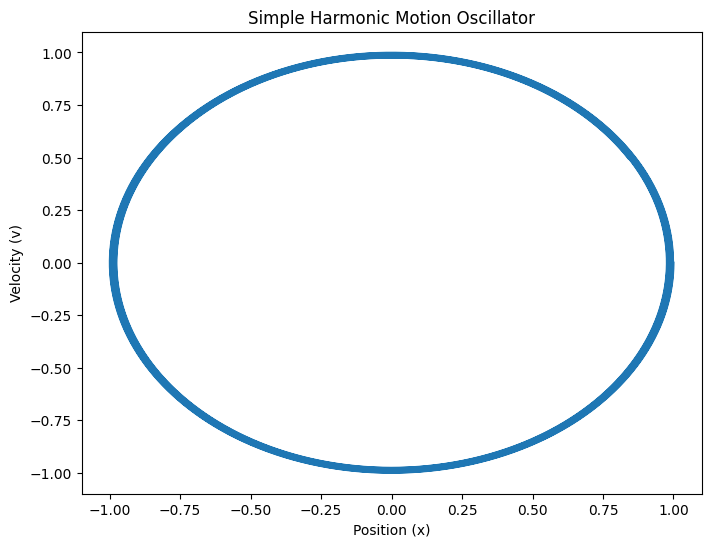

In [5]:
plt.figure(figsize=(8, 6))
plt.title('Simple Harmonic Motion Oscillator')
plt.xlabel('Position (x)')
plt.ylabel('Velocity (v)')
plt.plot(x_values, v_values)
plt.show()

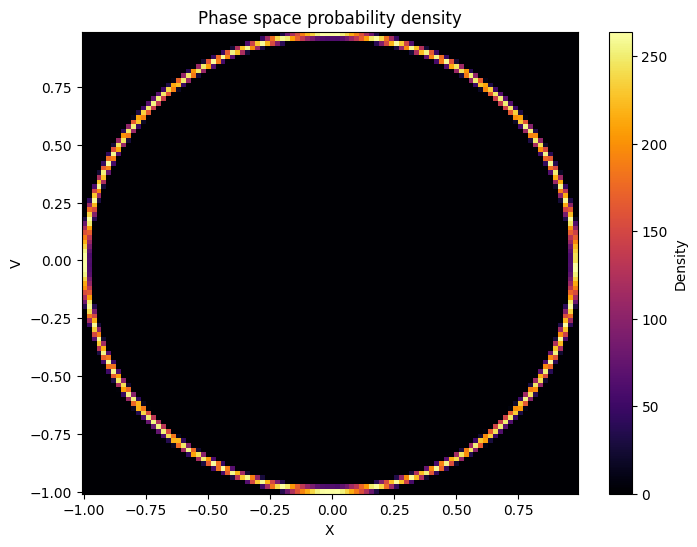

In [6]:
grid_size = 100

hist, xedges, yedges = np.histogram2d(x_values, v_values, bins=grid_size)
xgrid, ygrid = np.meshgrid(xedges[:-1], yedges[:-1])

plt.figure(figsize=(8, 6))
plt.title('Phase space probability density')
plt.xlabel('X')
plt.ylabel('V')
plt.pcolormesh(xgrid, ygrid, hist.T, cmap='inferno')
plt.colorbar(label='Density')
plt.show()

# SHM Temperature Constant
---

In [7]:
def integrate_motion(initial_position, initial_velocity, t_start, t_end, dt, alpha=1, kb=1.0, T=120, Q=0.5):
    x_values = []
    v_values = []
    
    t = t_start
    x = initial_position
    v = initial_velocity
    while t < t_end:
        x_values.append(x)
        v_values.append(v)
        a = -k*x/m - alpha*v
        v = v + a*dt
        x = x + v*dt + 0.5*a*dt**2
        alpha = alpha + (1/Q)*(m*v*v/2 - kb*T)*dt
        t = t + dt
        
    return x_values, v_values

In [8]:
x_values, v_values = integrate_motion(initial_position, initial_velocity, t_start, t_end, dt)

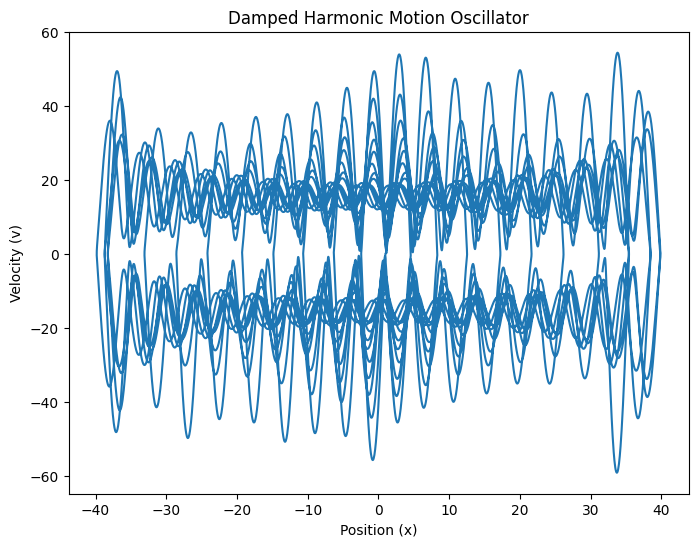

In [9]:
plt.figure(figsize=(8, 6))  
plt.title('Damped Harmonic Motion Oscillator')
plt.xlabel('Position (x)')
plt.ylabel('Velocity (v)')
plt.plot(x_values, v_values)
plt.show()

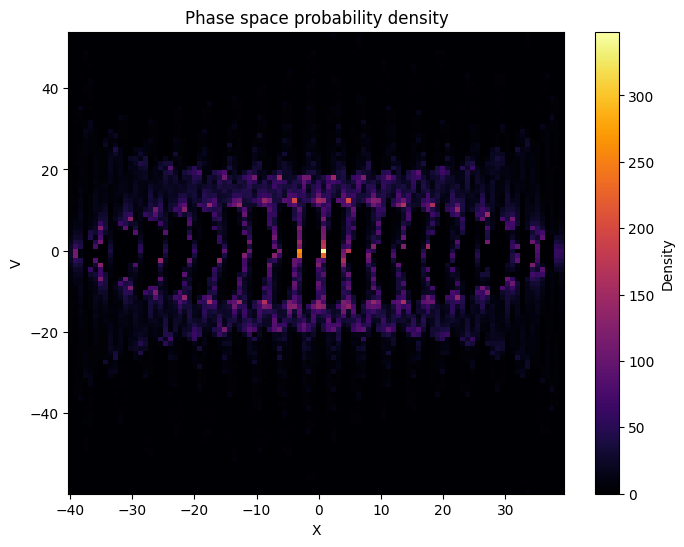

In [10]:
grid_size = 100

hist, xedges, yedges = np.histogram2d(x_values, v_values, bins=grid_size)

xgrid, ygrid = np.meshgrid(xedges[:-1], yedges[:-1])

plt.figure(figsize=(8, 6))
plt.title('Phase space probability density')
plt.xlabel('X')
plt.ylabel('V')
plt.pcolormesh(xgrid, ygrid, hist.T, cmap='inferno')
plt.colorbar(label='Density')
plt.show()


# Monte Carlo
---

In [20]:
from tqdm import tqdm
import random
import math

In [12]:
def generate_particles(N, box_length=18, min_distance=3, temperature=100):
    positions = np.zeros((N, 3))
    num_attempts = 0
    for i in range(N):
        while True:
            new_position = np.random.uniform(low=0, high=box_length, size=3)
            if i == 0:
                break
            min_dist = np.min(np.linalg.norm(positions[:i] - new_position, axis=1))
            if min_dist >= min_distance:
                break
            num_attempts += 1
            if num_attempts > 1000:
                raise ValueError("Could not generate positions with given constraints.")
        positions[i] = new_position
    
    m = 1 
    k = 1  
    std_dev = np.sqrt(k * temperature / m)
    velocities = np.random.normal(loc=0, scale=std_dev, size=(N, 3))
    
    return positions, velocities

In [13]:
N = 108  
positions, velocities = generate_particles(N)
print(positions)

[[ 8.90965748 10.79037061 13.12286832]
 [11.3901458  10.84081321  6.5929677 ]
 [ 1.43678357  1.1792767   7.65984475]
 [ 7.32418296 14.82777772  1.271071  ]
 [10.65377174  2.05140656 10.14302308]
 [17.97120678  2.58843966  5.96753297]
 [11.00945405 15.42199851  6.02714607]
 [ 6.52813099  2.15488193  2.96149447]
 [ 4.97373887 16.06175825  7.97998048]
 [ 5.4356936   8.99357934  5.53014354]
 [ 8.14281391 15.70097017  9.86982916]
 [17.56153679 12.88702842 11.32818799]
 [ 2.00049069 17.96504109  6.68682094]
 [15.01827288  4.03811302 16.3118292 ]
 [ 0.63354484 16.58515     1.73328976]
 [16.0003559  11.39209272 13.67706939]
 [15.71052421  4.10475256 11.84481522]
 [16.46187045 13.13965746  4.9841329 ]
 [ 0.73352011  7.32318837 11.88889368]
 [12.40776456  9.27972444 16.7288306 ]
 [ 2.45205103  6.93966279  8.47839074]
 [12.4100426   9.25154699 11.02811534]
 [17.94186722 14.16969056 14.45305762]
 [ 0.89768544 12.24075686  6.17964825]
 [ 4.8680242  15.50149929 12.97618084]
 [13.7834627  16.17652837

In [14]:
delta_matrix = positions[:, np.newaxis] - positions
mindist = 0.3
delta_matrix[delta_matrix < mindist] = mindist

In [15]:
distance_matrix = np.sum(np.square(delta_matrix), axis=-1)

In [16]:
def calculate_grad(pos, delta, dist, eps=1, sig=3.4):
    gradients = []
    for i in range(len(pos)):
        for d in range(3):
            U = 0
            for j in range(len(pos)):
                if j != i:
                    delta_ij_d = pos[i][d] - pos[j][d]
                    dist_ij = dist[i][j]
                    U += (1 / dist_ij**8 - 2 * sig**6 / dist_ij**14) * delta_ij_d
            U *= 24 * eps * sig**6
            gradients.append(U)
    return [gradients[i:i+3] for i in range(0, len(gradients), 3)]

In [17]:
def calculate_pot(dist, eps=1, sig=3.4):
    U = 0
    for i in range(len(dist)):
        for j in range(i + 1, len(dist)):
            U += 4 * eps * (sig**12 / dist[i][j]**12 - sig**6 / dist[i][j]**6)
    return U

In [18]:
def main_loop(pos, delta, dis, max_iter=2000, beta=1, fac=1):
    pots = [calculate_pot(dis)]
    for _ in tqdm(range(max_iter)):
        part = [random.randint(0, 107), random.randint(0, 2)]
        pos1 = [p.copy() for p in pos]
        pos1[part[0]][part[1]] += fac * (random.random() - 0.5)
        delta = [[pos1[i][k] - pos1[j][k] for k in range(3)] for i in range(108) for j in range(108)]
        delta = [[mindist if x < mindist else x for x in row] for row in delta]
        dis = [[sum(x**2 for x in row) for row in delta]]
        pottt = calculate_pot(dis)
        if pottt - pots[-1] < 0:
            pots.append(pottt)
            pos = pos1
        elif random.random() < math.exp(-1 * beta * (pottt - pots[-1])):
            pots.append(pottt)
            pos = pos1
    return pots

In [ ]:
pots = main_loop(positions, delta_matrix, distance_matrix)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:12<00:00, 166.66it/s]


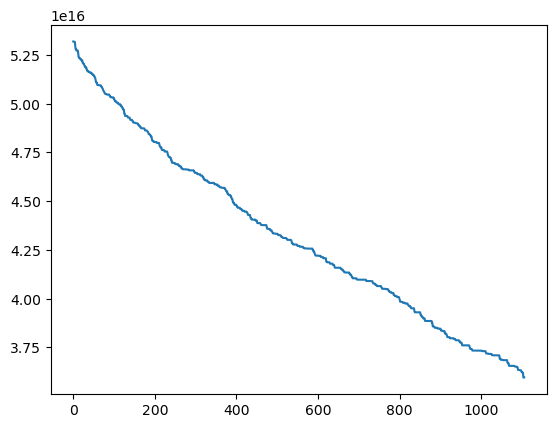

In [ ]:
plt.plot(pots[1:])
plt.show()

# Many Atoms
---

  0%|          | 0/500 [00:00<?, ?it/s]

100%|██████████| 1500/1500 [00:05<00:00, 252.74it/s]


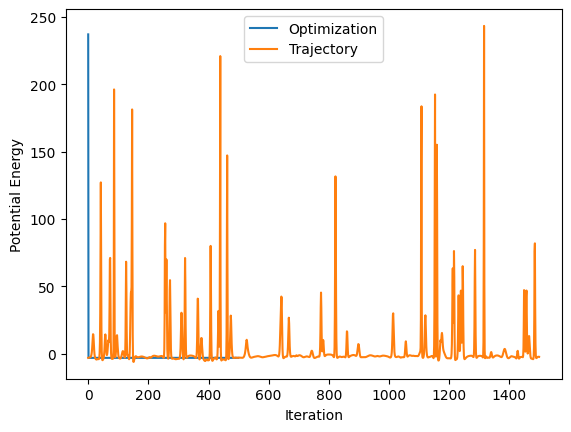

In [24]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

def generate_particles(N, box_length=100, min_distance=3, temperature=100):
   
    positions = np.random.uniform(low=0, high=box_length, size=(N, 3))
    

    m = 1  
    k = 1  
    std_dev = np.sqrt(k * temperature / m)
    velocities = np.random.normal(loc=0, scale=std_dev, size=(N, 3))
    
    return positions, velocities

def calculate_distances(positions, box_length):
  
    delta_matrix = positions[:, np.newaxis] - positions
    delta_matrix = delta_matrix - np.rint(delta_matrix / box_length) * box_length
    distances = np.linalg.norm(delta_matrix, axis=-1)
    np.fill_diagonal(distances, np.inf)  
    return distances

def calculate_potential_energy(distances, eps=1, sig=3.4):
    
    r_over_sigma = (sig / distances)
    r_over_sigma_6 = r_over_sigma ** 6
    r_over_sigma_12 = r_over_sigma_6 ** 2
    potential_energy = 4 * eps * (r_over_sigma_12 - r_over_sigma_6)
    return np.sum(potential_energy) / 2  

def optimize_positions(positions, box_length=100, min_distance=3, max_iter=500, alpha=0.01):
   
    energies = []
    for _ in tqdm(range(max_iter)):
        distances = calculate_distances(positions, box_length)
        potential_energy = calculate_potential_energy(distances)
        energies.append(potential_energy)
        
        
        forces = np.zeros_like(positions)
        for i in range(len(positions)):
            delta = positions[i] - positions
            delta -= np.round(delta / box_length) * box_length
            r = np.linalg.norm(delta, axis=1)
            
           
            mask = (r > 0) & (r < min_distance)
            if np.any(mask):
                f = np.zeros_like(delta[0])
                
                
                r_masked = r[mask]
                delta_masked = delta[mask]
                f += np.sum(24 * eps * (2 * (sig / r_masked) ** 13 - (sig / r_masked) ** 7) * delta_masked / r_masked[:, np.newaxis], axis=0)
                
                forces[i] = f
        
        
        positions -= alpha * forces
        positions %= box_length  
    
    return positions, energies

def simulate_trajectory(positions, velocities, box_length=100, min_distance=3, max_iter=1500, alpha=0.01):
   
    energies = []
    for _ in tqdm(range(max_iter)):
        distances = calculate_distances(positions, box_length)
        potential_energy = calculate_potential_energy(distances)
        energies.append(potential_energy)
        
      
        forces = np.zeros_like(positions)
        for i in range(len(positions)):
            delta = positions[i] - positions
            delta -= np.round(delta / box_length) * box_length
            r = np.linalg.norm(delta, axis=1)
            
            
            mask = (r > 0) & (r < min_distance)
            if np.any(mask):
                f = np.zeros_like(delta[0])
                
                
                r_masked = r[mask]
                delta_masked = delta[mask]
                f += np.sum(24 * eps * (2 * (sig / r_masked) ** 13 - (sig / r_masked) ** 7) * delta_masked / r_masked[:, np.newaxis], axis=0)
                
                forces[i] = f
        
       
        positions += velocities * alpha + 0.5 * alpha ** 2 * forces
        velocities += 0.5 * alpha * forces
        positions %= box_length  
        
    return energies


N = 108  
box_length = 100
min_distance = 3
temperature = 100
eps = 1
sig = 3.4
max_iter_opt = 500
max_iter_traj = 1500
alpha = 0.01


positions, velocities = generate_particles(N, box_length, min_distance, temperature)


positions_opt, energies_opt = optimize_positions(positions, box_length, min_distance, max_iter_opt, alpha)


energies_traj = simulate_trajectory(positions_opt.copy(), velocities, box_length, min_distance, max_iter_traj, alpha)


plt.plot(energies_opt, label='Optimization')
plt.plot(energies_traj, label='Trajectory')
plt.xlabel('Iteration')
plt.ylabel('Potential Energy')
plt.legend()
plt.show()


# VMD
---

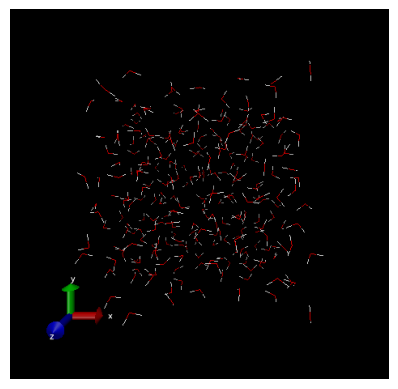

In [4]:
import matplotlib.image as mpimg


img = mpimg.imread('vmd_img.png')


plt.imshow(img)
plt.axis('off')  
plt.show()

# VMD from NAMD
---

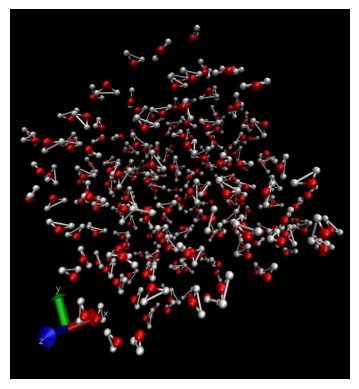

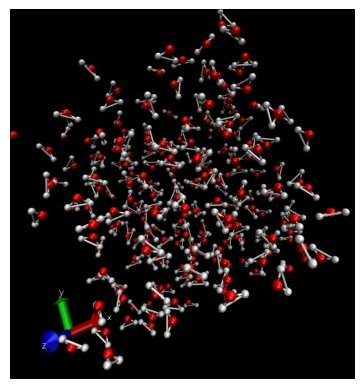

In [5]:
img = mpimg.imread('namd_1.jpeg')


plt.imshow(img)
plt.axis('off')  
plt.show()

img = mpimg.imread('namd_2.jpeg')


plt.imshow(img)
plt.axis('off')  
plt.show()